In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,Kamar tidak bersih,0
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,31ca5a04ccc0dae4eaafc91c9822bede,Wifinya sangat kurang memadai..,0


In [ ]:
#tokenize
#hapussimbol (koma dll)
#stemming
#remove stopword
#cek kbbi

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from kbbi import KBBI
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer_obj = WordNetLemmatizer()
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1>abaikan dibawah ini<h1>

In [76]:
#join semua kalimat menjadi 1

In [14]:
joined = " "
for i in dfRapi['review_text']:
    joined = joined + str(i)
joined

' inap rapi bersih suasana tenang layan ramah bantu lokasi obyek wisata bandung inapwifi kamar sedia heater dispenser sedia kursi kamar rokok duduk lantailantai kamar mandi kotor bau sdh jdi sarang nyamuk kamar mandi pesan superior double yg kasih twin murah maklumin tpi depan mohon jdi baik lbh lgwc jorok kasur bersih handuk gantibocorbersih layan kerapihantidur krn bantal bau apeklayan kmr bersih menu makan enak to sayang wifinya kutang baguskamar kecoa tlg perhati bersihkamar mandi banjirjaga bersih tidur nyaman tamu betiga anak tilam hibak pempijit sarang pempijit kepala ranjang untung pindah kamarlayan ramah ribet administrasi rekomen nginap dsinihotel bersih bgt nyaman kolam renang bersih layan hotel deket sm indomaret hotel makan manado murah enak remomended banget pokokroomnya bersih banget lokasi strategis pusat kota nyaman pesan double bed dapat twin bad gempa lombok bikin takut inap hotel tingkatsinyal internet dalam area inap wifi padaribut nyamanac nya dingin gk seru bange

In [15]:
joined = joined.split()
len(joined)

146568

In [16]:
fqJoin = FreqDist(joined)
fqJoin.most_common(20)

[('kamar', 6826),
 ('mandi', 2779),
 ('nya', 2508),
 ('yg', 2400),
 ('air', 2300),
 ('bersih', 2045),
 ('airy', 1665),
 ('ga', 1602),
 ('hotel', 1424),
 ('bau', 1388),
 ('kotor', 1362),
 ('tdk', 1300),
 ('gak', 1284),
 ('ac', 1192),
 ('panas', 1078),
 ('layan', 1075),
 ('nyaman', 978),
 ('sesuai', 885),
 ('dingin', 883),
 ('ramah', 816)]

In [19]:
# short = [w for w in joined if len(w)<4]
set(short)

{'a',
 'abg',
 'abs',
 'abu',
 'ac',
 'aca',
 'acc',
 'acu',
 'acx',
 'ad',
 'ada',
 'add',
 'adl',
 'ads',
 'adu',
 'aer',
 'ag',
 'aga',
 'agk',
 'ah',
 'ahh',
 'aih',
 'ain',
 'air',
 'aj',
 'aja',
 'ajj',
 'aju',
 'ak',
 'aka',
 'akh',
 'aku',
 'al',
 'ala',
 'all',
 'am',
 'ama',
 'an',
 'and',
 'ane',
 'anf',
 'ank',
 'any',
 'ap',
 'apa',
 'api',
 'apk',
 'app',
 'aq',
 'ar',
 'are',
 'art',
 'ary',
 'as',
 'asa',
 'ase',
 'asi',
 'ask',
 'at',
 'ati',
 'atm',
 'ato',
 'ats',
 'atw',
 'aud',
 'aye',
 'az',
 'aza',
 'b',
 'bab',
 'bad',
 'bag',
 'bai',
 'baj',
 'bak',
 'bal',
 'ban',
 'bar',
 'bas',
 'bau',
 'bca',
 'bcs',
 'be',
 'bed',
 'bel',
 'ber',
 'bet',
 'bf',
 'bff',
 'bg',
 'bgd',
 'bgs',
 'bgt',
 'bh',
 'bhw',
 'big',
 'bin',
 'bis',
 'bit',
 'biz',
 'bjm',
 'bk',
 'bkn',
 'bks',
 'blg',
 'blh',
 'bli',
 'blm',
 'bln',
 'bni',
 'bnr',
 'bny',
 'bom',
 'bon',
 'bor',
 'bos',
 'box',
 'boy',
 'bpk',
 'br',
 'brg',
 'bro',
 'brp',
 'brt',
 'bru',
 'bs',
 'bsa',
 'bsd',
 '

In [30]:
#kata tergabung
longWords = [w for w in joined if len(w)>9]
longWords

['lantailantai',
 'gantibocorbersih',
 'kerapihantidur',
 'baguskamar',
 'bersihkamar',
 'banjirjaga',
 'kamarlayan',
 'administrasi',
 'dsinihotel',
 'remomended',
 'pokokroomnya',
 'tingkatsinyal',
 'bangetlayan',
 'bersihwifi',
 'perhatinginap',
 'kosongkasure',
 'njeblossssskamar',
 'kecewagampang',
 'pendekinterior',
 'konfirmasi',
 'resepsionis',
 'doangkamar',
 'receptionist',
 'receptionist',
 'jadulpintu',
 'selimutamit',
 'breakfastnya',
 'handukkali',
 'dllwifinya',
 'fungsikeluarga',
 'outlingkung',
 'dinginsystem',
 'diberitahu',
 'layanlengkap',
 'okefasilitas',
 'resepsionis',
 'nyampering',
 'profesional',
 'handukfree',
 'konsumenkost',
 'ekspektasipegawai',
 'depatolong',
 'snacknyaaduuuh',
 'bangetkutu',
 'dengarkamar',
 'jangkaukamar',
 'ruangorang',
 'layansunyi',
 'pengapparkir',
 'seribetsuka',
 'ramahnyata',
 'tradisional',
 'recommended',
 'samarkamarnankamar',
 'kecoaksyedih',
 'kamarnyaman',
 'ramahhaving',
 'spotsmurah',
 'tutupfasilitas',
 'airminunnya',
 '

In [23]:
# long = [w for w in joined if len(w)>4]
long #len = 94437

['bersih',
 'suasana',
 'tenang',
 'layan',
 'ramah',
 'bantu',
 'lokasi',
 'obyek',
 'wisata',
 'bandung',
 'inapwifi',
 'kamar',
 'sedia',
 'heater',
 'dispenser',
 'sedia',
 'kursi',
 'kamar',
 'rokok',
 'duduk',
 'lantailantai',
 'kamar',
 'mandi',
 'kotor',
 'sarang',
 'nyamuk',
 'kamar',
 'mandi',
 'pesan',
 'superior',
 'double',
 'kasih',
 'murah',
 'maklumin',
 'depan',
 'mohon',
 'jorok',
 'kasur',
 'bersih',
 'handuk',
 'gantibocorbersih',
 'layan',
 'kerapihantidur',
 'bantal',
 'apeklayan',
 'bersih',
 'makan',
 'sayang',
 'wifinya',
 'kutang',
 'baguskamar',
 'kecoa',
 'perhati',
 'bersihkamar',
 'mandi',
 'banjirjaga',
 'bersih',
 'tidur',
 'nyaman',
 'betiga',
 'tilam',
 'hibak',
 'pempijit',
 'sarang',
 'pempijit',
 'kepala',
 'ranjang',
 'untung',
 'pindah',
 'kamarlayan',
 'ramah',
 'ribet',
 'administrasi',
 'rekomen',
 'nginap',
 'dsinihotel',
 'bersih',
 'nyaman',
 'kolam',
 'renang',
 'bersih',
 'layan',
 'hotel',
 'deket',
 'indomaret',
 'hotel',
 'makan',
 'man

In [27]:
# setLong = set(long)
setLong

{'identitas',
 'infokali',
 'bagusnyamukkeluarga',
 'mrccc',
 'salty',
 'sempaja',
 'tingkatbersih',
 'buanyak',
 'semarang',
 'kecewawastafel',
 'truss',
 'semprotbersih',
 'mandisewa',
 'airport',
 'ramahtype',
 'mandibaguspas',
 'hargakamarny',
 'ramahtdk',
 'boring',
 'temuputar',
 'rahasiabersih',
 'alakadar',
 'jamlayan',
 'kepake',
 'wifinya',
 'feeder',
 'bungalow',
 'backpaper',
 'ngbrol',
 'awatresepsionis',
 'layaklumayan',
 'candi',
 'debuwifi',
 'motivasi',
 'diduluin',
 'mengganggikamar',
 'thermos',
 'trsambung',
 'fakta',
 'kamarcek',
 'ottenga',
 'akntempat',
 'copotkamar',
 'fungsibooking',
 'pansnyatdk',
 'gakorg',
 'kamarfasilitas',
 'apekcomplimentary',
 'placeskamar',
 'nyaringsedia',
 'gadang',
 'cucihotel',
 'mandihhhhhjam',
 'semutwifi',
 'bgtttttt',
 'connectsebal',
 'mknnnya',
 'rusakhewan',
 'payaunyamuk',
 'sesuailebih',
 'joroksore',
 'dipindahh',
 'bagusfoto',
 'kualitasalas',
 'trimstolong',
 'ramahkasur',
 'sistemkamar',
 'debuhotel',
 'construction',
 

In [28]:
# setShort= set(short)
setShort

{'a',
 'abg',
 'abs',
 'abu',
 'ac',
 'aca',
 'acc',
 'acu',
 'acx',
 'ad',
 'ada',
 'add',
 'adl',
 'ads',
 'adu',
 'aer',
 'ag',
 'aga',
 'agk',
 'ah',
 'ahh',
 'aih',
 'ain',
 'air',
 'aj',
 'aja',
 'ajj',
 'aju',
 'ak',
 'aka',
 'akh',
 'aku',
 'al',
 'ala',
 'all',
 'am',
 'ama',
 'an',
 'and',
 'ane',
 'anf',
 'ank',
 'any',
 'ap',
 'apa',
 'api',
 'apk',
 'app',
 'aq',
 'ar',
 'are',
 'art',
 'ary',
 'as',
 'asa',
 'ase',
 'asi',
 'ask',
 'at',
 'ati',
 'atm',
 'ato',
 'ats',
 'atw',
 'aud',
 'aye',
 'az',
 'aza',
 'b',
 'bab',
 'bad',
 'bag',
 'bai',
 'baj',
 'bak',
 'bal',
 'ban',
 'bar',
 'bas',
 'bau',
 'bca',
 'bcs',
 'be',
 'bed',
 'bel',
 'ber',
 'bet',
 'bf',
 'bff',
 'bg',
 'bgd',
 'bgs',
 'bgt',
 'bh',
 'bhw',
 'big',
 'bin',
 'bis',
 'bit',
 'biz',
 'bjm',
 'bk',
 'bkn',
 'bks',
 'blg',
 'blh',
 'bli',
 'blm',
 'bln',
 'bni',
 'bnr',
 'bny',
 'bom',
 'bon',
 'bor',
 'bos',
 'box',
 'boy',
 'bpk',
 'br',
 'brg',
 'bro',
 'brp',
 'brt',
 'bru',
 'bs',
 'bsa',
 'bsd',
 '

In [17]:
# setJoin = set(joined)
setJoin

{'identitas',
 'infokali',
 'bagusnyamukkeluarga',
 'mrccc',
 'salty',
 'sempaja',
 'ih',
 'tingkatbersih',
 'buanyak',
 'semarang',
 'kecewawastafel',
 'truss',
 'semprotbersih',
 'mandisewa',
 'airport',
 'must',
 'mandibaguspas',
 'ramahtype',
 'dana',
 'snek',
 'ramahtdk',
 'hargakamarny',
 'boring',
 'temuputar',
 'rahasiabersih',
 'worh',
 'alakadar',
 'jamlayan',
 'kepake',
 'wifinya',
 'feeder',
 'bungalow',
 'backpaper',
 'ngbrol',
 'awatresepsionis',
 'layaklumayan',
 'fish',
 'candi',
 'debuwifi',
 'motivasi',
 'diduluin',
 'mengganggikamar',
 'thermos',
 'trsambung',
 'fakta',
 'kamarcek',
 'truz',
 'ottenga',
 'akntempat',
 'copotkamar',
 'fungsibooking',
 'pansnyatdk',
 'kmdn',
 'gakorg',
 'kamarfasilitas',
 'apekcomplimentary',
 'placeskamar',
 'nyaringsedia',
 'gadang',
 'cucihotel',
 'mandihhhhhjam',
 'semutwifi',
 'ck',
 'bgtttttt',
 'connectsebal',
 'mknnnya',
 'rusakhewan',
 'payaunyamuk',
 'dl',
 'sesuailebih',
 'joroksore',
 'dipindahh',
 'bangeeet',
 'bagusfoto',

<h1> abaikan diatas ini <h1>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from kbbi import KBBI
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer_obj = WordNetLemmatizer()
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,Kamar tidak bersih,0
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,31ca5a04ccc0dae4eaafc91c9822bede,Wifinya sangat kurang memadai..,0


In [ ]:
df = data

# Mengambil data stopwords indonesian dan English

In [68]:
eng = stopwords.words('english')
ind = stopwords.words('indonesian')

# FUNGSI UNTUK CLEANING DATA

In [110]:
def hurufkecil(text):
    return text.lower()

def tokenize(text):
    text = word_tokenize(text)
    return(text)

def hapusSimbol(sentence): #tokenize first
    words = []
    for word in sentence:
        if word.isalpha():
            words.append(word)
    return words

def hapusSimbolLine(text):
    text = text.replace('\n','')
    text = text.replace('\t','')
    text = text.replace('nya','')
    return text

def hapusKataAlay(text):
    text = text.replace('jlk','jelek')
    text = text.replace('bad','jelek')
    text = text.replace('tai','jelek')
    text = text.replace('bkn','tidak')
    text = text.replace('ga','tidak')
    text = text.replace('gaa','tidak')
    text = text.replace('gag','tidak')
    text = text.replace('gg','tidak')
    text = text.replace('gk','tidak')
    text = text.replace('gpp','aman')
    text = text.replace('gx','tidak')
    text = text.replace('hps','hapus')
    text = text.replace('ih','kotor')
    text = text.replace('ihh','kotor')
    text = text.replace('ktr','kotor')
    text = text.replace('kzl','kesal')
    text = text.replace('mdh','mudah')
    text = text.replace('krg','kurang')
    text = text.replace('jos','bagus')
    text = text.replace('mhn','mohon')
    text = text.replace('jls','jelas')
    text = text.replace('nda','tidak')
    text = text.replace('ndk','tidak')
    text = text.replace('ngk','tidak')
    text = text.replace('omg','astaga')
    text = text.replace('sad','sedih')
    text = text.replace('tdk','tidak')
    text = text.replace('tlg','tolong')
    text = text.replace('udh','sudah')
    text = text.replace('bks','bekas')
    text = text.replace('bgd','banget')
    text = text.replace('bgt','banget')
    text = text.replace('blm','belum')
    text = text.replace('far','jauh')
    return text

def hapusSingkatan(text):
    words = []
    for word in text:
        if len(word)>4 or word=='bau':
            words.append(word)
    return words

def removeStopWords(text):
    words = []
    for word in text:
        if word not in ind:
            words.append(word)
    return words

def removeStopWordsEng(text):
    words = []
    for word in text:
        if word not in eng:
            words.append(word)
    return words

def stemm(data):
    words = []
    for word in data:
        stm = stemmer.stem(word)
        words.append(stm)
    return words

def stemmEng(data):
    words = []
    for word in data:
        stm = lemmatizer_obj.lemmatize(word,pos='v')
        words.append(stm)
    return words


<h1>PREPROCESSING TRAIN (DF)</h1>

In [89]:
df['review_text'] = [data.lower() for data in df['review_text'] if data.isalpha]
df

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"wc jorok.. kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,kamar tidak bersih,0
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,31ca5a04ccc0dae4eaafc91c9822bede,wifinya sangat kurang memadai..,0


In [82]:
# TOKENIZING KALIMAT MENJADI KATA

df['review_text'] = [ tokenize(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, rapi, ,, bersih, ,, suasana, t...
1        [wifi, tidak, sampai, kamar, ,, tidak, tersedi...
2        [lantai, kamar, mandi, kotor, ,, bau, ,, dan, ...
3        [wc, jorok, .., kasur, tidak, dibersihkan, ,, ...
4                                            [bocor, lagi]
                               ...                        
14851                       [kotor, dan, tidak, ada, wifi]
14852                               [kamar, tidak, bersih]
14853    [kamarnya, terlalu, kecil, beberapa, cm, antar...
14854               [wifinya, sangat, kurang, memadai, ..]
14855    [pelayan, sangat, sangat, buruk, ., dulu, pela...
Name: review_text, Length: 14856, dtype: object

In [83]:
# HAPUS SIMBOL SIMBOL DALAM KALIMAT

df['review_text'] = [ hapusSimbol(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, rapi, bersih, suasana, tenang,...
1        [wifi, tidak, sampai, kamar, tidak, tersedia, ...
2        [lantai, kamar, mandi, kotor, bau, dan, sepert...
3        [wc, jorok, kasur, tidak, dibersihkan, handuk,...
4                                            [bocor, lagi]
                               ...                        
14851                       [kotor, dan, tidak, ada, wifi]
14852                               [kamar, tidak, bersih]
14853    [kamarnya, terlalu, kecil, beberapa, cm, antar...
14854                   [wifinya, sangat, kurang, memadai]
14855    [pelayan, sangat, sangat, buruk, dulu, pelayan...
Name: review_text, Length: 14856, dtype: object

In [95]:
#HAPUS KATA SINGKATAN

df['review_text'] = [ hapusSingkatan(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, bersih, suasana, tenang, pelay...
1        [tidak, sampai, kamar, tidak, tersedia, heater...
2        [lantai, kamar, mandi, kotor, bau, seperti, sa...
3        [jorok, kasur, tidak, dibersihkan, handuk, tid...
4                                                  [bocor]
                               ...                        
14851                                       [kotor, tidak]
14852                               [kamar, tidak, bersih]
14853    [kamarnya, terlalu, kecil, beberapa, antara, k...
14854                   [wifinya, sangat, kurang, memadai]
14855    [pelayan, sangat, sangat, buruk, pelayan, rama...
Name: review_text, Length: 14856, dtype: object

In [96]:
#HAPUS STOPWORD INDONESIA

df['review_text'] = [ removeStopWords(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, bersih, suasana, tenang, pelay...
1        [kamar, tersedia, heater, dispenser, tersedia,...
2        [lantai, kamar, mandi, kotor, bau, sarang, nya...
3             [jorok, kasur, dibersihkan, handuk, diganti]
4                                                  [bocor]
                               ...                        
14851                                              [kotor]
14852                                      [kamar, bersih]
14853                           [kamarnya, kasur, dinding]
14854                                   [wifinya, memadai]
14855    [pelayan, buruk, pelayan, ramah, ganti, pelaya...
Name: review_text, Length: 14856, dtype: object

In [97]:
#HAPUS STOPWORD ENGLISH

df['review_text'] = [ removeStopWordsEng(data) for data in df['review_text'] ]
df['review_text']

0        [penginapannya, bersih, suasana, tenang, pelay...
1        [kamar, tersedia, heater, dispenser, tersedia,...
2        [lantai, kamar, mandi, kotor, bau, sarang, nya...
3             [jorok, kasur, dibersihkan, handuk, diganti]
4                                                  [bocor]
                               ...                        
14851                                              [kotor]
14852                                      [kamar, bersih]
14853                           [kamarnya, kasur, dinding]
14854                                   [wifinya, memadai]
14855    [pelayan, buruk, pelayan, ramah, ganti, pelaya...
Name: review_text, Length: 14856, dtype: object

In [99]:
#STEMMING INDO

df['review_text'] = df['review_text'].apply(lambda x: [stemmer.stem(y) for y in x])
df['review_text']

0        [inap, bersih, suasana, tenang, layan, ramah, ...
1        [kamar, sedia, heater, dispenser, sedia, kursi...
2        [lantai, kamar, mandi, kotor, bau, sarang, nya...
3                    [jorok, kasur, bersih, handuk, ganti]
4                                                  [bocor]
                               ...                        
14851                                              [kotor]
14852                                      [kamar, bersih]
14853                              [kamar, kasur, dinding]
14854                                      [wifinya, pada]
14855    [layan, buruk, layan, ramah, ganti, layan, bur...
Name: review_text, Length: 14856, dtype: object

In [100]:
#STEMMING ENG
df['review_text'] = df['review_text'].apply(lambda x: [lemmatizer_obj.lemmatize(y,pos='v') for y in x])
df['review_text']

0        [inap, bersih, suasana, tenang, layan, ramah, ...
1        [kamar, sedia, heater, dispenser, sedia, kursi...
2        [lantai, kamar, mandi, kotor, bau, sarang, nya...
3                    [jorok, kasur, bersih, handuk, ganti]
4                                                  [bocor]
                               ...                        
14851                                              [kotor]
14852                                      [kamar, bersih]
14853                              [kamar, kasur, dinding]
14854                                      [wifinya, pada]
14855    [layan, buruk, layan, ramah, ganti, layan, bur...
Name: review_text, Length: 14856, dtype: object

In [103]:
#SET DATA

df['review_text'] = [ set(w) for w in df['review_text']]
df

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"{tenang, inap, layan, bantu, bandung, wisata, ...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"{kursi, rokok, lantai, sedia, heater, dispense...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"{kasih, depan, mohon, maklumin, lantai, superi...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"{kasur, jorok, handuk, ganti, bersih}",0
4,e2afef18bd695fae43d4d53b8c547bd4,{bocor},0
...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,{kotor},0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,"{bersih, kamar}",0
14853,5217f5f284066f232d7b3c3bbd3cccd2,"{kasur, kamar, dinding}",0
14854,31ca5a04ccc0dae4eaafc91c9822bede,"{wifinya, pada}",0


In [107]:
#list to text
df['review_text'] = [ " ".join(data) for data in df['review_text']]
df['review_text']

0        tenang inap layan bantu bandung wisata obyek b...
1        kursi rokok lantai sedia heater dispenser kama...
2        kasih depan mohon maklumin lantai superior kot...
3                          kasur jorok handuk ganti bersih
4                                                    bocor
                               ...                        
14851                                                kotor
14852                                         bersih kamar
14853                                  kasur kamar dinding
14854                                         wifinya pada
14855                    layan recommend ganti buruk ramah
Name: review_text, Length: 14856, dtype: object

<h2> dua cell dibawah tidak usah ditulis

In [6]:
data_rapi = pd.read_csv('data_rapih.csv')
data_rapi.isnull().sum()

review_id        0
review_text    229
category         0
dtype: int64

In [7]:
data_rapi = data_rapi.dropna()
data_rapi.isnull().sum()

review_id      0
review_text    0
category       0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<h2> - WORDCLOUD PLOT </h2>

untuk melihat frekuensi kata yang sering muncul dari data yang berlabel 0 atau 1

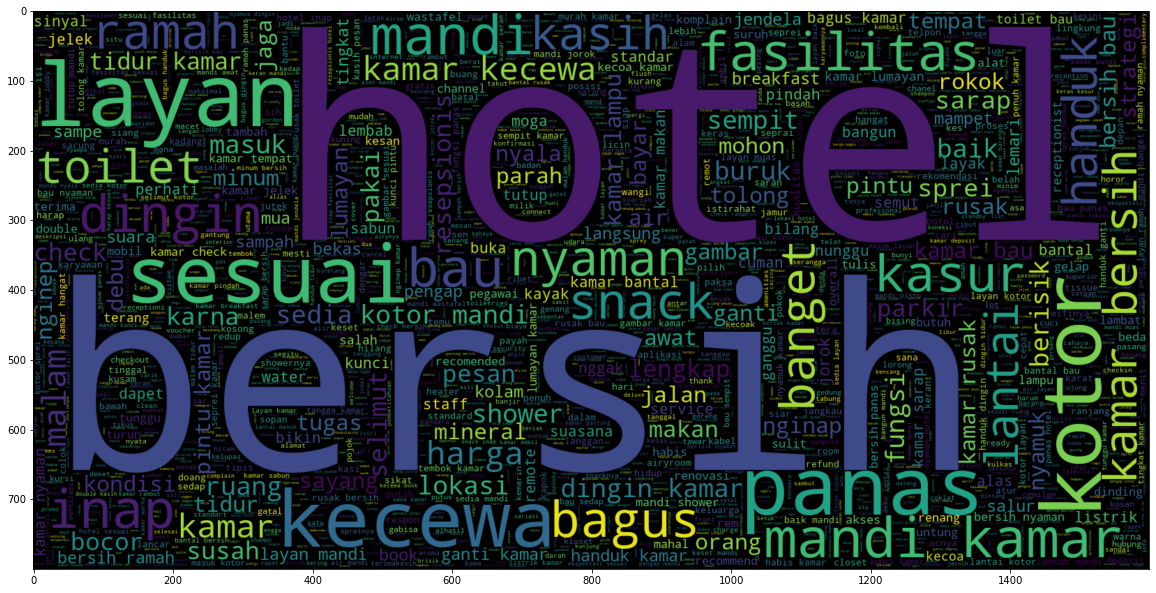

In [15]:
# WORDCLOUD DATA BERLABEL 0 (NEGATIF)

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data_rapi[data_rapi.category == 0].review_text))
plt.imshow(wc, interpolation='bilinear')

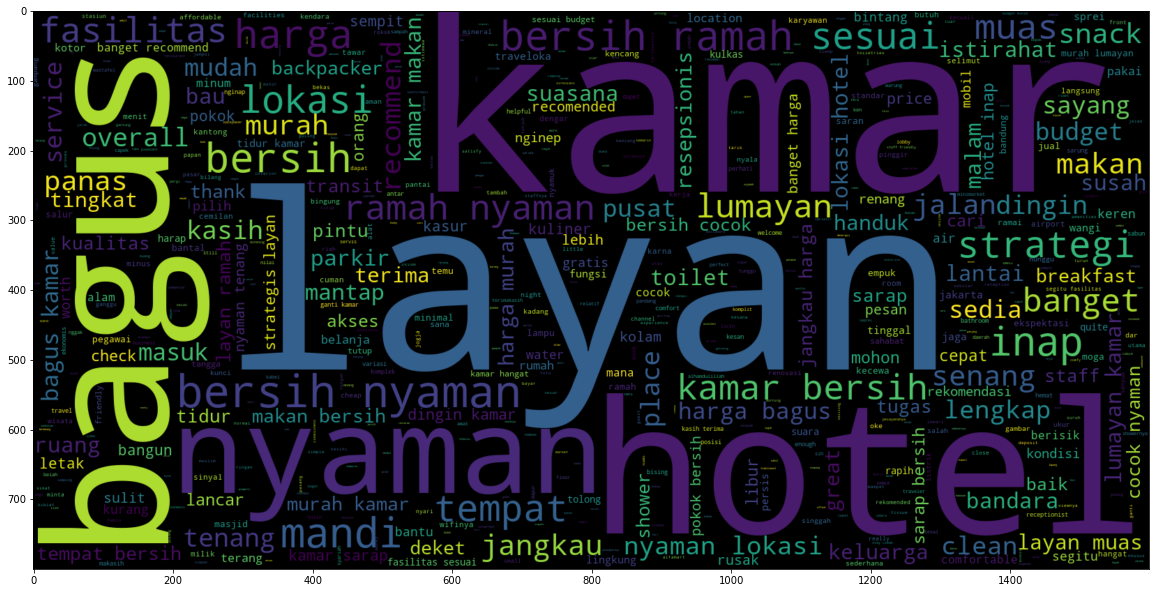

In [146]:
# WORDCLOUD DATA BERLABEL 1 (POSITIF)

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data_rapi[data_rapi.category == 1].review_text))
plt.imshow(wc, interpolation='bilinear')

<h2> - CEK KESEIMBANGAN LABEL </h2>

label Data Training Imbalance (tidak seimbang), bisa mengakibatkan model yang di build menjadi overfitting, 

No handles with labels found to put in legend.


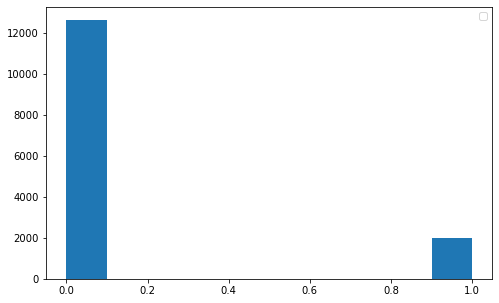

In [148]:
plt.figure(figsize=(8,5))
plt.hist(label)
plt.legend()
plt.show()

# FEATURE ENGINEERING

<h2> - menentukan column feature data train

In [19]:
feature = data_rapi['review_text'].values.tolist()
len(feature)

14624

<h2> - menentukan column label dari data train

In [26]:
label = data_rapi['category'].values
len(label)

14624

# MODELLING

<h2> - Vectorisasi </h2>

In [78]:
#instansiasi object TfidVectorizer dengan fit terhadap feature data training

tv = TfidfVectorizer().fit(feature)
tfid_train = tv.transform(feature)
tfid_train.shape

(14624, 7556)

<h2>- handling imbalance</h2>

In [36]:
# overcampling data menggunakan class SMOTE() untuk handling imbalanced data
# dengan output X (feature) dan y (Label)

oversample = SMOTE()
X, y = oversample.fit_resample(tfid_train, label)

<h2>- cek keseimbangan label data</h2>

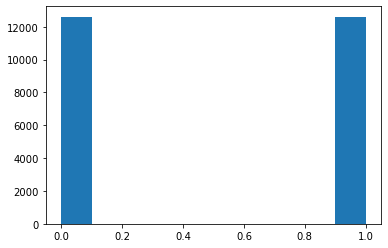

In [38]:
plt.figure(figsize=)
plt.hist(y)
plt.show()

<h2> Membagi data set menjadi 70% data train dan 30% data test

In [45]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data_vector, label, test_size=0.3, random_state=21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<h2> TRAINING MODEL </h2>

In [48]:
# training model SVM
model = SVC()
model = model.fit(X_train,y_train)

In [49]:
y_pred = model.predict(X_test)

# ACCURACY MODEL (VALIDATION)

In [143]:
print('#### Score Accuracy ####: \n',accuracy_score(y_pred,y_test))
print('#### Classification Report ####: \n',classification_report(y_pred,y_test))
print('#### Confusion Matrix ####: \n',confusion_matrix(y_test,y_pred))

#### Score Accuracy ####: 
 0.9593077024706038
#### Classification Report ####: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3902
           1       0.94      0.97      0.96      3667

    accuracy                           0.96      7569
   macro avg       0.96      0.96      0.96      7569
weighted avg       0.96      0.96      0.96      7569

#### Confusion Matrix ####: 
 [[3691   97]
 [ 211 3570]]


<h1> testing model dengan input

In [108]:
#test model

text = ['Overall oke lah buat singgah']

# CLEANING & PREDICT DATA TEST

In [105]:
data_test = pd.read_csv('test.csv')
data_test

,review_id,review_text
0,7302180ac7160f04a405d8aa7bd6beb8,"Kasur rusak, punggung saya sakit, kasurnya ga ..."
1,3184c670e170f565c7522eb76a320ba1,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,"tempat ridur atas bawah.. ac nya pararel, tdk ..."
3,061d388950340070a6ac03fabc9027b0,"ac kurang dingin, tidak ada snack sperti di foto"
4,e62d87c348674b6c06856964f3ab16b8,Lumayan untuk guest house dengan standart harg...
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,Tolong kamar 214 kulkasnya dibagusin..!!!
3710,4fabd4722dd4074841f9656f75105f09,"buruk sekali, sangat mengecewakan.\n"
3711,44ff89997547d54cccb2a33776181240,Lampu redup. Bau pengap. Dalam kamar mandi ga ...
3712,c46cf84e3665a10199a539fee919edd6,"Kamar mawar tidak bisa dikunci dari luar, suas..."


In [114]:
def cleaning(X):
    X = [data.lower() for data in X if data.isalpha]
    X = [ tokenize(data) for data in X ]
    X = [ hapusSimbol(data) for data in X ]
    X = [ hapusSingkatan(data) for data in X ]
    X = [ removeStopWords(data) for data in X ]
    X = [ removeStopWordsEng(data) for data in X ]
    X = [ stemm(data) for data in X ]
    X = [ stemmEng(data) for data in X]
    X = [ set(w) for w in X]
    X = [ " ".join(data) for data in X]
    return X

data = cleaning(data_test['review_text'])
data_vector = tv.transform(data)
pred = model.predict(data_vector)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

<h2> - menyimpan hasil prediksi kedalam file csv

In [131]:
submission = pd.DataFrame({
    'review_id': data_test['review_id'],
    'category' : pred
})
submission.to_csv('submisi4.csv',index=False)

<h1>Done

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#model naive bayes
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [54]:
#MODEL_NB

model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)

MultinomialNB()

In [55]:
y_pred_nb = model_nb.predict(X_test)
print(accuracy_score(y_pred_nb,y_test))

0.8828114678293038


<h1>HASIL PREDIKSI</h1>

In [293]:
pred_nb = model_nb.predict(X_test)
print(accuracy_score(pred_nb,y_test))

0.8990352254879964


In [294]:
print(classification_report(pred_nb,y_test))
print(confusion_matrix(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4243
           1       0.31      0.89      0.46       214

    accuracy                           0.90      4457
   macro avg       0.65      0.90      0.70      4457
weighted avg       0.96      0.90      0.92      4457

[[3816   23]
 [ 427  191]]


In [186]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4095
           1       0.52      0.88      0.65       362

    accuracy                           0.92      4457
   macro avg       0.75      0.91      0.81      4457
weighted avg       0.95      0.92      0.93      4457



In [61]:
from sklearn.metrics import accuracy_score
# accuracy_score(pred_svm, y_test)

In [189]:
print(confusion_matrix(y_test,pred_svm))

[[3797   42]
 [ 298  320]]


ValueError: setting an array element with a sequence.

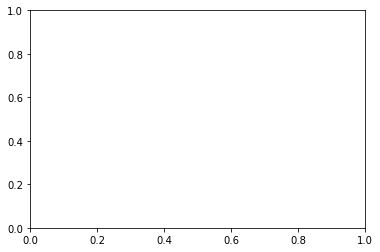

In [230]:
plt.plot(tfid_test)

In [208]:
test_nb = model_nb.predict(tfid_test)
test_nb

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [210]:
test_svc = model.predict(tfid_test)
test_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [211]:
test_svc.shape

(3714,)

In [216]:
# submission = pd.DataFrame({
#     'review_id': data_test['review_id'],
#     'category' : test_svc
# })
submission

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,0
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,0
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,0
3710,4fabd4722dd4074841f9656f75105f09,0
3711,44ff89997547d54cccb2a33776181240,0
3712,c46cf84e3665a10199a539fee919edd6,0


In [219]:
x = pd.read_csv('submisi2.csv')
x.category.value_counts()

0    3089
1     625
Name: category, dtype: int64

In [217]:
submission.to_csv('submisi3.csv',index=False)

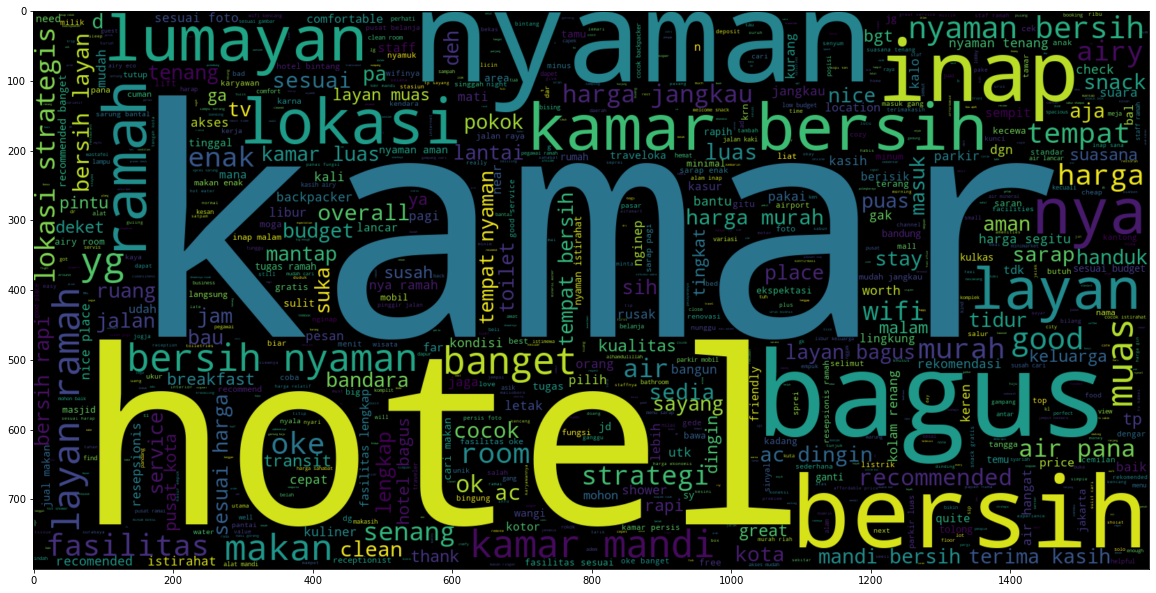

In [170]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category == 1].review_text))
plt.imshow(wc, interpolation='bilinear')